In [1]:
import gzip
import json
import re
import os
import sys
import numpy as np
import pandas as pd
import sklearn.model_selection
import scipy
import sklearn.metrics.pairwise as pw
from time import time
import matplotlib.pyplot as plt

In [2]:
# Specify your directory
DIR = r'C:\Users\Jackie\OneDrive - Georgia Institute of Technology\ISYE6740 Computational Data Analytics\Project\Data\Genres\YoungAdult'

In [3]:
# Load pickled files
df = pd.read_pickle('atleast500ratings50books.pkl')

In [4]:
df['book_id'].value_counts()

2767052     46342
41865       40894
6148028     39578
7260188     38465
256683      37238
            ...  
14762463      116
7776692       107
18626858      105
6596839        93
1242729        45
Name: book_id, Length: 1949, dtype: int64

In [5]:
# Calculate average rating
avg_rating = np.mean(df['rating'])
avg_rating

3.9592542580101724

In [6]:
# Define user-book rating matrix
mat = df.pivot(index='user_id', columns='book_id', values='rating')
mat.replace(0, np.nan, inplace=True)

In [7]:
mat

book_id,10025007,10025305,10048874,10118172,10165727,10165761,10174795,10188580,101914,10193062,...,9917938,9917945,9917998,9918083,9918128,99561,9961796,9972838,9972882,9975679
user_id,,,,,,,,,,,,,,,,,,,,,
000192962b87d560f00b06fdcbd71681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
000387b0e3d77b6dcc36a66d5cc27347,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,3.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
0007f8dd09337afd986d765569cf0110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
000883382802f2d95a3dd545bb953882,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000891e40dc9b9a6726caff9232be979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffbeab06c4060af4387a8922bf017cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fffcca008c7770bc559e43b2edf24a6d,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
fffce7dae5ac5e8fb6288d81658ececc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN


In [8]:
# Train/test split
train, test = sklearn.model_selection.train_test_split(df, test_size=0.1, random_state=1111)
train.shape, test.shape

((4896776, 10), (544087, 10))

In [9]:
# Save train values
mat_trainonly = mat
training_mask = np.array(mat_trainonly.notna())
train_actuals = np.array(mat_trainonly)[training_mask]

# Set all test values to nan
zipped_test = np.c_[test['user_id'], test['book_id'], test['rating']]
test_mask = np.full(mat.shape, False)
for i in range(len(zipped_test)):
    row_idx = mat_trainonly.index.get_loc(zipped_test[i][0])
    col_idx = mat_trainonly.columns.get_loc(zipped_test[i][1])
    test_mask[row_idx, col_idx] = True
test_actuals = np.array(mat)[test_mask] # Save test actuals
mat_trainonly[test_mask] = np.nan

In [10]:
train_actuals, test_actuals

(array([3., 4., 1., ..., 3., 3., 3.]), array([1., 4., 5., ..., 5., 3., 3.]))

In [11]:
# Calculate sparsity of data
not_null = mat_trainonly.count().sum()
sparsity = 1 - not_null / (mat.shape[0] * mat_trainonly.shape[1])
sparsity

0.955105860584201

In [12]:
mat_trainonly.count().sort_values(ascending=False)

book_id
2767052     41720
41865       36939
6148028     35641
7260188     34663
256683      33513
            ...  
14762463      107
7776692       100
18626858      100
6596839        82
1242729        37
Length: 1949, dtype: int64

In [13]:
# Calculate average rating for each book over users
avg_book_rating = np.nanmean(mat_trainonly, axis=0) # column avg r_j
# For empty columns, fill with avg rating
np.nan_to_num(avg_book_rating, copy=False, nan=avg_rating)

# Fill missing value with the appropriate average for that book
filled = np.where(np.isnan(mat_trainonly), avg_book_rating, mat_trainonly)

# Remove from each user (row) the mean over all books
avg_user_rating = np.average(filled, axis=1) # row avg r_i
avg_user_rating_col_vec = avg_user_rating.reshape(len(avg_user_rating),1)
normalized = filled - avg_user_rating_col_vec

In [14]:
# Helper functions for prediction calculation
## Select/Rearrange the solumns of arr to match the indices (given by idx)
def select_cols(arr, idx):
    rows = np.indices(idx.shape)[0]
    return arr[rows, idx]

## Set the select columns of arr specified by idx to the corresponding values in vals
def set_select_cols(arr, vals, idx):
    selected_vals = select_cols(vals, idx)
    rows = np.indices(idx.shape)[0]
    arr[rows, idx] = selected_vals
    
# Helper function for evaluation
## Define error function
def rmse(predictions, actuals):
    return np.sqrt(((predictions - actuals) ** 2).mean())

In [45]:
# Tune rank k for SVD
ks = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,19]
errors4k = pd.DataFrame(index=ks, columns=['train_rmse', 'test_rmse'])

for k in ks:
    # Perform SVD using rank k
    U, S, VT = scipy.sparse.linalg.svds(normalized, k=k)
    # Calculate a reduced rating matrix to remove noise
    reduced_rating = U @ np.diag(S) @ VT
    # Calculate matrix product for dimensionality-reduced rating matrix
    sqrtS = np.diag(np.sqrt(S))
    meta_on_users = U @ np.transpose(sqrtS)
    meta_on_items = sqrtS @ VT
    # Calculate similarities between books
    num_books = reduced_rating.shape[1]
    similarities = pw.cosine_similarity(meta_on_items.T, meta_on_items.T)
    # Calculate prediction of rating by user i of book j, by avging over the ratings of all books by the same user, each weighted according to its similarity to book j
    num_users = reduced_rating.shape[0]
    predictions = np.zeros((num_users, num_books))
    # Isolate the set of items which appear to be the most similar to the active item. Vozalis suggests 10 items is best.
    adjusted_rating = reduced_rating + avg_user_rating[:,np.newaxis]

    most_similar_idx = np.argsort(similarities, axis=1)[:,:-11:-1]
    nonneg_sims = np.where(similarities > 0, similarities, 0)
    selected_sims = np.zeros(nonneg_sims.shape)
    set_select_cols(selected_sims, nonneg_sims, most_similar_idx)

    numerator = adjusted_rating @ selected_sims.T
    denominator = np.sum(selected_sims, axis=1)
    predictions = np.divide(numerator, denominator)
    # Calculate training error
    train_predictions = predictions[training_mask]
    train_rmse = rmse(train_predictions, train_actuals)
    errors4k['train_rmse'][k] = train_rmse
    # Calculate test error
    test_predictions = predictions[test_mask]
    test_rmse = rmse(test_predictions, test_actuals)
    errors4k['test_rmse'][k] = test_rmse

In [16]:
train_actuals, test_actuals

(array([3., 4., 1., ..., 3., 3., 3.]), array([1., 4., 5., ..., 5., 3., 3.]))

In [17]:
errors4k

,train_rmse,test_rmse
1,0.958952,0.959992
2,0.933502,0.93766
3,0.92247,0.928929
4,0.912694,0.92078
5,0.907953,0.917927
6,0.903075,0.914535
7,0.899424,0.912491
8,0.895774,0.910239
9,0.895533,0.911364
10,0.89317,0.910287


In [18]:
# BEST COMPARISON
# Calculate error if just rated everything the avg rating per book across all users
avg_book_rating_row = avg_book_rating.reshape((1, mat_trainonly.shape[1]))
mat_bookavg = pd.DataFrame(np.repeat(avg_book_rating_row, mat_trainonly.shape[0], axis=0), index=mat_trainonly.index, columns=mat_trainonly.columns)

book_avg_train = np.array(mat_bookavg)[training_mask]
book_avg_train_rmse = rmse(book_avg_train, train_actuals)
book_avg_test = np.array(mat_bookavg)[test_mask]
book_avg_test_rmse = rmse(book_avg_test, test_actuals)
book_avg_train_rmse, book_avg_test_rmse

(0.9541257664501664, 0.9543001512881961)

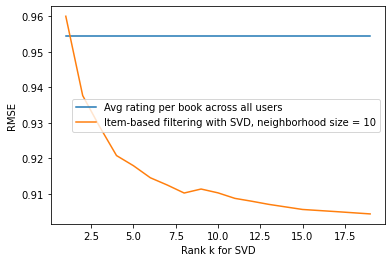

In [23]:
plt.plot(ks, np.repeat(book_avg_test_rmse, len(ks)), label='Avg rating per book across all users')
plt.plot(ks, errors4k['test_rmse'], label='Item-based filtering with SVD, neighborhood size = 10')
plt.xlabel('Rank k for SVD')
plt.ylabel('RMSE')
plt.legend()
plt.show()

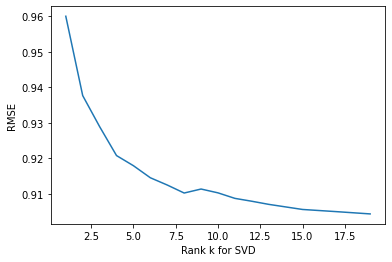

In [46]:
plt.plot(ks, errors4k['test_rmse'], label='Item-based filtering with SVD, neighborhood size = 10')
plt.xlabel('Rank k for SVD')
plt.ylabel('RMSE')
plt.show()

Optimal is k=6

In [22]:
errors4k.loc[6]

train_rmse    0.903075
test_rmse     0.914535
Name: 6, dtype: object

In [30]:
train_actuals, test_actuals

(array([3., 4., 1., ..., 3., 3., 3.]), array([1., 4., 5., ..., 5., 3., 3.]))

In [31]:
train_predictions, test_predictions

(array([3.94533394, 4.09460356, 3.43988187, ..., 3.58712615, 3.62873943,
        3.54240459]),
 array([3.43988187, 4.1645668 , 4.09908086, ..., 3.52520418, 3.37106323,
        3.54240459]))

In [38]:
# Tune neighborhood size
neighs = range(10,110,10)
errors4neighs = pd.DataFrame(index=neighs, columns=['train_rmse', 'test_rmse'])

for neigh in neighs:
    # Perform SVD using rank k
    U, S, VT = scipy.sparse.linalg.svds(normalized, k=6)
    # Calculate a reduced rating matrix to remove noise
    reduced_rating = U @ np.diag(S) @ VT
    # Calculate matrix product for dimensionality-reduced rating matrix
    sqrtS = np.diag(np.sqrt(S))
    meta_on_users = U @ np.transpose(sqrtS)
    meta_on_items = sqrtS @ VT
    # Calculate similarities between books
    num_books = reduced_rating.shape[1]
    similarities = pw.cosine_similarity(meta_on_items.T, meta_on_items.T)
    # Calculate prediction of rating by user i of book j, by avging over the ratings of all books by the same user, each weighted according to its similarity to book j
    num_users = reduced_rating.shape[0]
    predictions = np.zeros((num_users, num_books))
    # Isolate the set of items which appear to be the most similar to the active item. Vozalis suggests 10 items is best.
    adjusted_rating = reduced_rating + avg_user_rating[:,np.newaxis]

    most_similar_idx = np.argsort(similarities, axis=1)[:,:-neigh-1:-1]
    nonneg_sims = np.where(similarities > 0, similarities, 0)
    selected_sims = np.zeros(nonneg_sims.shape)
    set_select_cols(selected_sims, nonneg_sims, most_similar_idx)

    numerator = adjusted_rating @ selected_sims.T
    denominator = np.sum(selected_sims, axis=1)
    predictions = np.divide(numerator, denominator)
    # Calculate training error
    train_predictions = predictions[training_mask]
    train_rmse = rmse(train_predictions, train_actuals)
    errors4neighs['train_rmse'][neigh] = train_rmse
    # Calculate test error
    test_predictions = predictions[test_mask]
    test_rmse = rmse(test_predictions, test_actuals)
    errors4neighs['test_rmse'][neigh] = test_rmse

In [39]:
errors4neighs

,train_rmse,test_rmse
10,0.903075,0.914535
20,0.912225,0.92148
30,0.917333,0.925379
40,0.920503,0.927802
50,0.922676,0.929447
60,0.924671,0.931018
70,0.926263,0.932288
80,0.927516,0.93325
90,0.928752,0.934234
100,0.929831,0.935085


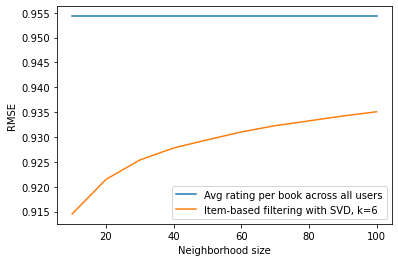

In [40]:
plt.plot(neighs, np.repeat(book_avg_test_rmse, len(neighs)), label='Avg rating per book across all users')
plt.plot(neighs, errors4neighs['test_rmse'], label='Item-based filtering with SVD, k=6')
plt.xlabel('Neighborhood size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

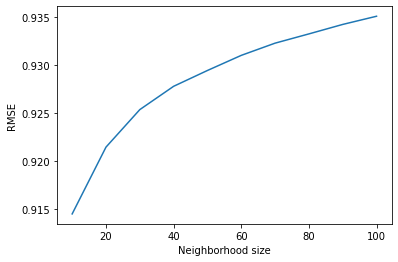

In [47]:
plt.plot(neighs, errors4neighs['test_rmse'], label='Item-based filtering with SVD, k=6')
plt.xlabel('Neighborhood size')
plt.ylabel('RMSE')
plt.show()